<a href="https://colab.research.google.com/github/kaviyakrishnamoorthy/payoda1/blob/main/payoda_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Payoda-EDA
#dataset information-->hepatitis.csv


In [38]:
#importing packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [9]:
cd sample_data

/content/sample_data


In [11]:
!ls

anscombe.json		      hepatitis.csv	     README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [69]:
#load the dataset
#creating a dataframe
data=pd.read_csv("hepatitis.csv")

In [70]:
#Exploring dataset
#view columns in the dataset
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [71]:
#information abou the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [72]:
#view first 5 rows in dataset
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [73]:
#checking null values
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [102]:
#Count the NaN under an entire DataFrame
data.isnull().sum().sum()


38

In [97]:
hepatitis_analysis = data

In [98]:
#Replacing missing values with mean of the attributes (missing values count exceeds 10)
hepatitis_analysis['bilirubin'].fillna(value=hepatitis_analysis['bilirubin'].mean(), inplace=True)
hepatitis_analysis['alk_phosphate'].fillna(value=hepatitis_analysis['alk_phosphate'].mean(), inplace=True)
hepatitis_analysis['protime'].fillna(value=hepatitis_analysis['protime'].mean(), inplace=True)
hepatitis_analysis['albumin'].fillna(value=hepatitis_analysis['albumin'].mean(), inplace=True)
hepatitis_analysis['liver_firm'].fillna(value=hepatitis_analysis['liver_firm'].mean(), inplace=True)


In [122]:
#replacing values with numerical data for better understanding
replace={'no':0,
                'yes': 1,
               'die': 0,
               'live': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

hepatitis_analysis.replace(replace, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [123]:
#drop remaining nan values (missing values <10)
hepatitis_analysis = hepatitis_analysis.dropna()

In [124]:
#Count the NaN under an entire DataFrame
hepatitis_analysis.isnull().sum().sum()


0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


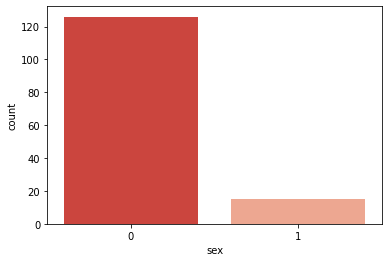

In [125]:
#insights of categorical data
sns.countplot(hepatitis_analysis['sex'],palette="Reds_r")
plt.show()

In [126]:
#counts the male and female ratio
hepatitis_analysis['sex'].value_counts()

0    126
1     15
Name: sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


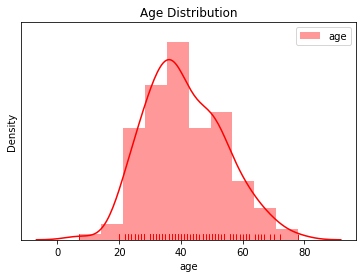

In [127]:
#distribution of age

sns.distplot(data.age,bins=10,label="age",color="red",rug=True)
plt.yticks([])
plt.title("Age Distribution")
plt.legend()
plt.show()

No handles with labels found to put in legend.


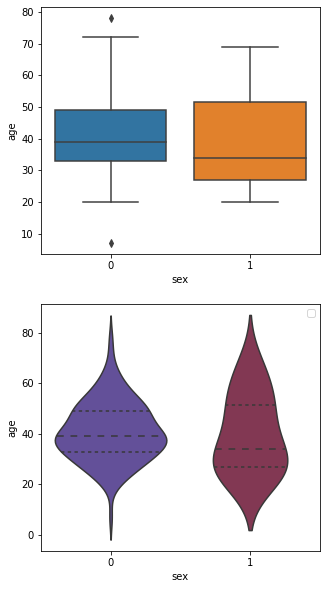

In [128]:
#age distribution with gender male and female

fig,axis=plt.subplots(2,1,figsize=(5,10))

sns.boxplot(x=hepatitis_analysis["sex"],y=hepatitis_analysis['age'],ax=axis[0])
sns.violinplot(x=hepatitis_analysis["sex"],y=hepatitis_analysis['age'],inner="quartile",bandwidth=0.2, ax=axis[1],palette='twilight')

plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [131]:
#checking class imbalance

total_patients = hepatitis_analysis.shape[0]
living_patients = (np.sum(hepatitis_analysis['class'] == 1)/total_patients)*100
dead_patients = (np.sum(hepatitis_analysis['class'] == 0)/total_patients)*100
print("Living patients:",round(living_patients,2),"%")
print("Dead patients:",round(dead_patients,2),"%")

Living patients: 81.56 %
Dead patients: 18.44 %


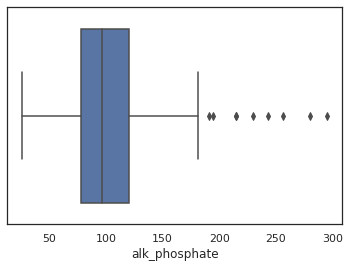

In [151]:
#alk_phosphate level
#import seaborn as sns
sns.boxplot(x ='alk_phosphate', data=hepatitis_analysis)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


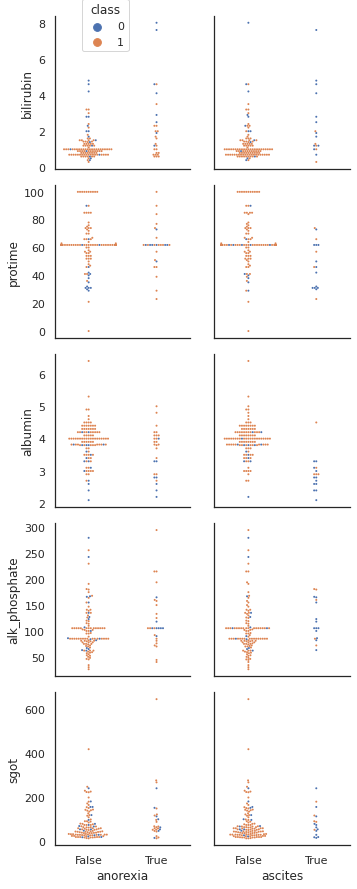

In [154]:
#Pairgrid to visualize the categorical features of the dataset
graph = sns.PairGrid(hepatitis_analysis,
                 x_vars=['anorexia', 'ascites'],
                 y_vars=['bilirubin' ,'protime', 'albumin','alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 2)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));

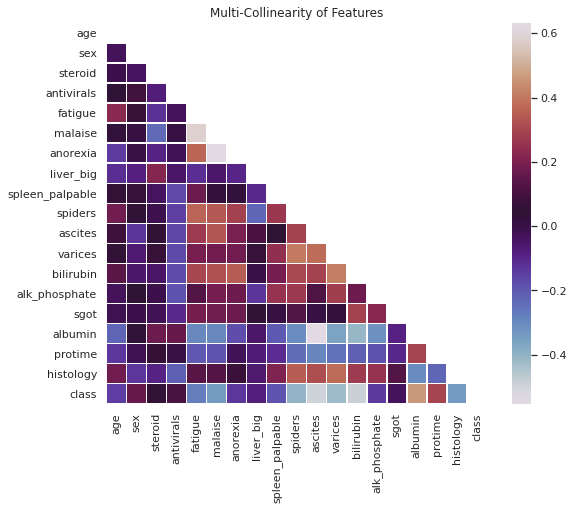

In [155]:
# Heatmap
sns.set(style="white")
# Create a correlation matrix
corr = hepatitis_analysis.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9,7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap="twilight",square=True, 
            linewidth=.5)
ax.set_title('Multi-Collinearity of Features')
plt.savefig('correlation.png')

In heatmap that some of the variables show a coefficient of -0.6 or -0.4, but most of them display a very low correlation coefficient. So we can conclude that there is no strong linear correlation between our variable